# Summary of fit and evaluate experiments for type 2 graph neural networks

In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

import graph_utils as graph_utils
import graph_neural_networks as graph_nn
import data_preparation_utils as data_prep
from iterative_updaters import VanillaGradientDescent, MomentumGradientDescent, NesterovMomentumGradientDescent, RMSPropGradientDescent, AdamGradientDescent
import training_and_evaluation as train_eval
import graph_nn_experiments as experiments

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
experiments_directory = "100k_fit_and_evaluate_experiments_kipf"

def gradient_descent_set_file_name(no_of_layers, no_of_channels, activation):
    return "%s/simulation_Xy_%d_%d_%s_kipf.csv" % (experiments_directory, no_of_layers, no_of_channels, activation)

gradient_descent_set_file_name(10, 11, "relu")

'100k_fit_and_evaluate_experiments_kipf/simulation_Xy_10_11_relu_kipf.csv'

Seems to work fine. Unfortunately, I haven't saved these file names to fit_eval_results.csv

In [10]:
ochota_adj_matrix = np.genfromtxt("macierz_sasiedztwa.txt")

We need this adjacency matrix.

In [11]:
df = pd.read_csv("100k_fit_and_evaluate_experiments_kipf/fit_eval_results_kipf.csv", header=None)
df.sort_values([5])

,0,1,2,3,4,5
23,4,6,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016114,0.018182
64,4,4,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017373,0.018914
47,6,2,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.019775,0.019782
27,6,5,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016396,0.019894
45,6,4,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017367,0.019968
35,4,5,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016964,0.020170
55,4,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.018657,0.020180
68,5,6,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.015501,0.020468
11,3,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.019415,0.020631
30,5,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017779,0.020800


We need the original training data for scaling:

In [12]:
traffic_lights_data = pd.read_csv("100k.csv", header=None)
traffic_lights_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,81,14,58,108,83,60,82,61,64,94,...,28,87,73,69,25,7,77,95,5,49082
1,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,51223
2,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,51461
3,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,45119
4,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,50660


In [13]:
X, y, X_scaler, y_scaler = data_prep.scale_standard_traffic_light_data(traffic_lights_data)

C:\Users\Lukasz\AppData\Local\conda\conda\envs\aind\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [159]:
np.mean(traffic_lights_data[21])

48922.72721576669

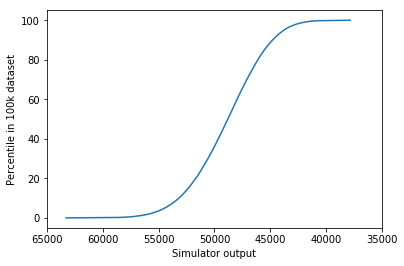

In [157]:
ps = [i / 4.0 for i in range(401)]
percentiles=-np.percentile(-traffic_lights_data[21], ps)
plt.xlim(65000.0,35000.0)
plt.xlabel("Simulator output")
plt.ylabel("Percentile in 100k dataset")
plt.plot(percentiles, ps)

Train test split:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=831191)

This code not really used, just kept in case:

In [46]:
tf.reset_default_graph()

no_of_layers = 3
no_of_channels = 6
activation_name = "tanh"
activation = tf.nn.tanh
model_checkpoint_file = "100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt"


nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
print("Constructing network with %d layers, %d channels per layer and %s activation function" % (no_of_layers, no_of_channels, activation_name))
nn_output = graph_nn.transfer_matrix_neural_net(nn_input, no_of_layers, no_of_channels, activation, ochota_adj_matrix, verbose=True, share_weights_in_transfer_matrix=False, share_biases_in_transfer_matrix=False)
print("Restoring gradient descent test set")
#X, y = load_gradient_descent_data(no_of_layers, no_of_channels, activation_name)
print("Scaling")
#X_test, y_test = scale_data(X, y, X_scaler, y_scaler)
print("Restoring network weights from %s and evaluating on test set" % model_checkpoint_file)
model_avg_error, actual_vs_predicted = train_eval.evaluate_model_on_a_dataset(model_checkpoint_file, nn_output,nn_input, X_test, y_test, y_scaler)
print("Model avg. error on test set: %f" % model_avg_error)
# close session (if open)
try:
    sess.close()
except:
    pass
# open new session
sess =  tf.Session()
saver = tf.train.Saver()
saver.restore(sess, model_checkpoint_file)



Constructing network with 3 layers, 6 channels per layer and tanh activation function
(21, 48, 1, 6)
(?, 48, 6)
(48, 21, 6, 6)
(?, 21, 6)
(21, 48, 6, 6)
(?, 48, 6)
(?, 288)
Restoring gradient descent test set
Scaling
Restoring network weights from 100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt and evaluating on test set
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt
Model avg. error on test set: 0.016347
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt


In [19]:
for row in df.head(1).iterrows():
    print(row[1])

0                                                    1
1                                                    1
2                                                 relu
3    100k_fit_and_evaluate_experiments/model_1_1_re...
4                                             0.049325
5                                             0.068004
Name: 0, dtype: object


In [33]:
def load_gradient_descent_data(no_of_layers, no_of_channels, activation_name):
    data_file_name = gradient_descent_set_file_name(no_of_layers, no_of_channels, activation_name)
    data = pd.read_csv(data_file_name, header=None)
    no_of_columns = data.shape[1]
    X = data.iloc[:,0:(no_of_columns-1)]
    y = data.iloc[:,no_of_columns-1].values.reshape(-1,1)
    
    data_normalized = data.copy()
    data_normalized.iloc[:,0:(no_of_columns-1)] = X_scaler.transform(data_normalized.iloc[:,0:(no_of_columns-1)])
    data_normalized.iloc[:,no_of_columns-1] = y_scaler.transform(data_normalized.iloc[:,no_of_columns-1].values.reshape(-1,1))
    X_scaled = data_normalized.iloc[:,0:(no_of_columns-1)]
    y_scaled = data_normalized.iloc[:,no_of_columns-1]
    
    return X, y, X_scaled, y_scaled

def scale_data(X_input, y_input, X_scaler, y_scaler):
    X_input_ = X_input.copy()
    y_input_ = y_input.copy()
    X_scaled = X_scaler.transform(X_input_)
    y_scaled = y_scaler.transform(y_input_)
    return X_scaled, y_scaled
    
    
def find_lowest_avg_waiting_time(no_of_layers, no_of_channels, activation_name):
    X, y, X_scaled, y_scaled = load_gradient_descent_data(no_of_layers, no_of_channels, activation_name)
    return min(y)[0]

def assess_avg_error_below_some_target_values(target_values, 
                                              no_of_layers,
                                              no_of_channels, 
                                              activation_name,
                                              model_file_name,
                                              X_scaler, 
                                              y_scaler):
    
    g_X, g_y, scaled_g_X, scaled_g_y = load_gradient_descent_data(no_of_layers, no_of_channels, activation_name)
    #scaled_g_X, scaled_g_y = scale_data(g_X, g_y, X_scaler, y_scaler)
    
    if activation_name == "relu":
        activation = tf.nn.relu
    else:
        activation = tf.nn.tanh
        
    tf.reset_default_graph()
    nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
    targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    print("Constructing network with %d layers, %d channels per layer and %s activation function" % (no_of_layers, no_of_channels, activation_name))
    nn_output = graph_nn.transfer_matrix_neural_net(nn_input, no_of_layers, no_of_channels, activation, ochota_adj_matrix, verbose=True, share_weights_in_transfer_matrix=False, share_biases_in_transfer_matrix=False)
    
    avg_errors = []
    
    for target_value in target_values:
        
        selected_indices = np.argwhere(g_y.reshape(-1) < target_value).reshape(-1)
        
        if len(selected_indices) > 0:
            X_test = scaled_g_X.iloc[selected_indices,:]
            y_test = scaled_g_y[selected_indices]
            model_avg_error, actual_vs_predicted = train_eval.evaluate_model_on_a_dataset(model_file_name, nn_output, nn_input, X_test, y_test, y_scaler)
        else:
            model_avg_error = np.nan
            
        avg_errors.append(model_avg_error)
        
    return avg_errors

def find_maximum_relative_error(no_of_layers, no_of_channels, activation_name, model_file_name, X_scaler, y_scaler):
    
    if activation_name == "relu":
        activation = tf.nn.relu
    else:
        activation = tf.nn.tanh
        
    tf.reset_default_graph()
    nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
    targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    print("Constructing network with %d layers, %d channels per layer and %s activation function" % (no_of_layers, no_of_channels, activation_name))
    nn_output = graph_nn.kipfs_transfer_matrix_neural_net(nn_input, no_of_layers, no_of_channels, activation, ochota_adj_matrix, verbose=True)
    
    model_max_error = train_eval.find_model_maximum_relative_error_on_a_dataset(model_file_name, nn_output, nn_input, X_test, y_test, y_scaler)
    
    return model_max_error

def assess_error_stdev_below_some_target_values(target_values, 
                                                no_of_layers,
                                                no_of_channels, 
                                                activation_name,
                                                model_file_name,
                                                X_scaler, 
                                                y_scaler):
    
    g_X, g_y, scaled_g_X, scaled_g_y = load_gradient_descent_data(no_of_layers, no_of_channels, activation_name)
    #scaled_g_X, scaled_g_y = scale_data(g_X, g_y, X_scaler, y_scaler)
    
    if activation_name == "relu":
        activation = tf.nn.relu
    else:
        activation = tf.nn.tanh
        
    tf.reset_default_graph()
    nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
    targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    print("Constructing network with %d layers, %d channels per layer and %s activation function" % (no_of_layers, no_of_channels, activation_name))
    nn_output = graph_nn.kipfs_transfer_matrix_neural_net(nn_input, no_of_layers, no_of_channels, activation, ochota_adj_matrix, verbose=True)
    
    error_stdevs = []
    
    for target_value in target_values:
        
        selected_indices = np.argwhere(g_y.reshape(-1) < target_value).reshape(-1)
        
        if len(selected_indices) > 0:
            X_test = scaled_g_X.iloc[selected_indices,:]
            y_test = scaled_g_y[selected_indices]
            model_error_stdev = train_eval.find_model_relative_error_stdev_on_a_dataset(model_file_name, nn_output, nn_input, X_test, y_test, y_scaler)
        else:
            model_error_stdev = np.nan
            
        error_stdevs.append(model_error_stdev)
        
    return error_stdevs

Add min waiting times (from actual simulation) to the data frame:

In [25]:
min_waiting_times = []

for row in df.iterrows():
    no_of_layers = row[1][0]
    no_of_channels = row[1][1]
    activation_name = row[1][2]
    min_waiting_time = find_lowest_avg_waiting_time(no_of_layers, no_of_channels, activation_name)
    min_waiting_times.append(min_waiting_time)

df_plus_min_waiting_time = df.copy() 
df_plus_min_waiting_time[len(df_plus_min_waiting_time.columns)] = pd.Series(min_waiting_times, df_plus_min_waiting_time.index)

In [26]:
df_plus_min_waiting_time.sort_values([5])

,0,1,2,3,4,5,6
23,4,6,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016114,0.018182,32666.0
64,4,4,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017373,0.018914,33194.0
47,6,2,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.019775,0.019782,33936.0
27,6,5,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016396,0.019894,31672.0
45,6,4,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017367,0.019968,32788.0
35,4,5,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016964,0.020170,32068.0
55,4,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.018657,0.020180,33031.0
68,5,6,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.015501,0.020468,31604.0
11,3,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.019415,0.020631,33443.0
30,5,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017779,0.020800,32009.0


In [45]:
row = next(df.iterrows())[1]

In [16]:
avg_errors_list = []
for row in df.iterrows():
    r = row[1]
    avg_errors = assess_avg_error_below_some_target_values([37000.0,36000.0,35000.0,34000.0,33000.0,32000.0], 
                                              r[0],
                                              r[1], 
                                              r[2],
                                              r[3],
                                              X_scaler, 
                                              y_scaler)
    avg_errors_list.append(avg_errors)
    
avg_error_list = np.array(avg_errors_list)

Constructing network with 3 layers, 6 channels per layer and tanh activation function
(21, 21, 1, 6)
(?, 21, 6)
(21, 21, 6, 6)
(?, 21, 6)
(21, 21, 6, 6)
(?, 21, 6)
(?, 126)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
Constructing network with 1 layers, 3 channels per layer and relu activation function
(21, 21, 1, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_3_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experim

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_4_1_tanh.ckpt
Constructing network with 1 layers, 1 channels per layer and tanh activation function
(21, 21, 1, 1)
(?, 21, 1)
(?, 21)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_1_tanh.ckpt
Constructing network with 1 layers, 5 channels per layer and tanh activation function
(21, 21, 1, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_5_tanh.ckpt
Constructing network with 3 layers, 4 channels per layer and relu activation function
(21, 21, 1, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(?, 84)
INFO:tensorflow:Restoring parameters from 100k_fit_and_ev

Constructing network with 6 layers, 5 channels per layer and tanh activation function
(21, 21, 1, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
Constructing network with 3 layers, 2 channels per layer and tanh activation function
(21, 21, 1, 2)
(?, 21, 2)
(

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_2_relu.ckpt
Constructing network with 6 layers, 1 channels per layer and relu activation function
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(?, 21)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_1_relu.ckpt
Constructing network with 1 layers, 4 channels per layer and relu activation function
(21, 21, 1, 4)
(?, 21, 4)
(?, 84)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_4_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_4_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_4_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_4_relu

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_2_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_2_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_2_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_2_5_tanh.ckpt
Constructing network with 6 layers, 3 channels per layer and relu activation function
(21, 21, 1, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_3_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_3_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_3_relu.ckpt
INFO:ten

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
Constructing network with 4 layers, 1 channels per layer and relu activation function
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(?, 21)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_4_1_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_4_1_relu.ckpt
Constructing network with 5 layers, 1 channels per layer and

In [17]:
avg_errors_df = pd.DataFrame(avg_error_list,columns= ["37000.0","36000.0","35000.0","34000.0","33000.0","32000.0"]
                           )
df_with_avg_errors = df_plus_min_waiting_time.copy()
df_with_avg_errors = pd.concat([df_with_avg_errors, avg_errors_df],axis=1)

In [18]:
df_with_avg_errors.sort_values([5])

,0,1,2,3,4,5,6,37000.0,36000.0,35000.0,34000.0,33000.0,32000.0
23,4,6,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016114,0.018182,32666.0,0.016510,0.014407,0.012880,0.010233,0.031313,NaN
64,4,4,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017373,0.018914,33194.0,0.018650,0.016487,0.015070,0.016077,NaN,NaN
47,6,2,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.019775,0.019782,33936.0,0.017996,0.022292,0.039656,0.063580,NaN,NaN
27,6,5,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016396,0.019894,31672.0,0.020035,0.019122,0.020552,0.030664,0.062013,0.096631
45,6,4,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017367,0.019968,32788.0,0.018949,0.017740,0.014158,0.018921,0.042631,NaN
35,4,5,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016964,0.020170,32068.0,0.019082,0.017638,0.016573,0.016376,0.021626,NaN
55,4,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.018657,0.020180,33031.0,0.019335,0.019985,0.020557,0.027850,NaN,NaN
68,5,6,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.015501,0.020468,31604.0,0.019553,0.019035,0.015914,0.016345,0.030774,0.047977
11,3,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.019415,0.020631,33443.0,0.018382,0.016862,0.019858,0.051537,NaN,NaN
30,5,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017779,0.020800,32009.0,0.017902,0.015291,0.013006,0.013480,0.019665,NaN


Also calculate max error on test set:

In [29]:
max_errors = []

for row in df.iterrows():
    no_of_layers = row[1][0]
    no_of_channels = row[1][1]
    activation_name = row[1][2]
    model_file = row[1][3]
    max_error = find_maximum_relative_error(no_of_layers, no_of_channels, activation_name, model_file, X_scaler, y_scaler)
    max_errors.append(max_error)

df_plus_max_errors = df_plus_min_waiting_time.copy() 
df_plus_max_errors[len(df_plus_max_errors.columns)] = pd.Series(max_errors, df_plus_max_errors.index)

Constructing network with 3 layers, 6 channels per layer and tanh activation function
(21, 21, 1, 6)
(?, 21, 6)
(21, 21, 6, 6)
(?, 21, 6)
(21, 21, 6, 6)
(?, 21, 6)
(?, 126)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
Constructing network with 1 layers, 3 channels per layer and relu activation function
(21, 21, 1, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_3_relu.ckpt
Constructing network with 6 layers, 1 channels per layer and tanh activation function
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(?, 21)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_1_tanh.ckpt
Constructing network with 2 layers, 2 channels per layer and tanh activation function
(21, 21, 1, 2)
(?, 21, 2)
(21, 21, 2, 2)
(?, 21, 2)
(

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_2_tanh.ckpt
Constructing network with 6 layers, 5 channels per layer and relu activation function
(21, 21, 1, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_relu.ckpt
Constructing network with 5 layers, 3 channels per layer and tanh activation function
(21, 21, 1, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_3_tanh.ckpt
Constructing network with 2 layers, 5 channels per layer and relu activation function
(21, 21, 1, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evalu

(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_3_relu.ckpt
Constructing network with 5 layers, 4 channels per layer and tanh activation function
(21, 21, 1, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(?, 84)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_4_tanh.ckpt
Constructing network with 4 layers, 3 channels per layer and relu activation function
(21, 21, 1, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_4_3_relu.ckpt
Constructing network with 4 layers, 6 channels per layer and relu activation function
(21, 21, 1, 6)
(?, 21, 6)
(21, 21, 6, 6)
(?, 21, 6)
(21, 21, 6, 6)
(?, 21, 6)
(21, 21, 6

Now add stratified error stdev:

In [34]:
error_stdev_list = []
for row in df.iterrows():
    r = row[1]
    error_stdev = assess_error_stdev_below_some_target_values([37000.0,36000.0,35000.0,34000.0,33000.0,32000.0], 
                                              r[0],
                                              r[1], 
                                              r[2],
                                              r[3],
                                              X_scaler, 
                                              y_scaler)
    error_stdev_list.append(error_stdev)
    
error_stdev_list = np.array(error_stdev_list)

Constructing network with 3 layers, 6 channels per layer and tanh activation function
(21, 21, 1, 6)
(?, 21, 6)
(21, 21, 6, 6)
(?, 21, 6)
(21, 21, 6, 6)
(?, 21, 6)
(?, 126)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_3_6_tanh.ckpt
Constructing network with 1 layers, 3 channels per layer and relu activation function
(21, 21, 1, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_3_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experim

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_4_1_tanh.ckpt
Constructing network with 1 layers, 1 channels per layer and tanh activation function
(21, 21, 1, 1)
(?, 21, 1)
(?, 21)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_1_tanh.ckpt
Constructing network with 1 layers, 5 channels per layer and tanh activation function
(21, 21, 1, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_5_tanh.ckpt
Constructing network with 3 layers, 4 channels per layer and relu activation function
(21, 21, 1, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(?, 84)
INFO:tensorflow:Restoring parameters from 100k_fit_and_ev

Constructing network with 6 layers, 5 channels per layer and tanh activation function
(21, 21, 1, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(21, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_5_tanh.ckpt
Constructing network with 3 layers, 2 channels per layer and tanh activation function
(21, 21, 1, 2)
(?, 21, 2)
(

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_2_relu.ckpt
Constructing network with 6 layers, 1 channels per layer and relu activation function
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(?, 21)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_1_relu.ckpt
Constructing network with 1 layers, 4 channels per layer and relu activation function
(21, 21, 1, 4)
(?, 21, 4)
(?, 84)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_4_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_4_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_4_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_1_4_relu

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_2_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_2_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_2_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_2_5_tanh.ckpt
Constructing network with 6 layers, 3 channels per layer and relu activation function
(21, 21, 1, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(21, 21, 3, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_3_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_3_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_6_3_relu.ckpt
INFO:ten

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_5_6_tanh.ckpt
Constructing network with 4 layers, 1 channels per layer and relu activation function
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(21, 21, 1, 1)
(?, 21, 1)
(?, 21)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_4_1_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments_kipf/kipf_model_4_1_relu.ckpt
Constructing network with 5 layers, 1 channels per layer and

In [35]:
error_stdev_df = pd.DataFrame(error_stdev_list,columns= ["37000.0","36000.0","35000.0","34000.0","33000.0","32000.0"]
                           )
df_with_error_stdev = df_plus_min_waiting_time.copy()
df_with_error_stdev = pd.concat([df_with_error_stdev, error_stdev_df],axis=1)

In [36]:
df_with_error_stdev.sort_values([5])

,0,1,2,3,4,5,6,37000.0,36000.0,35000.0,34000.0,33000.0,32000.0
23,4,6,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016114,0.018182,32666.0,0.013060,0.011723,0.010364,0.008745,0.004071,NaN
64,4,4,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017373,0.018914,33194.0,0.014489,0.013169,0.013121,0.010848,NaN,NaN
47,6,2,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.019775,0.019782,33936.0,0.015116,0.016377,0.017088,0.006465,NaN,NaN
27,6,5,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016396,0.019894,31672.0,0.015388,0.015223,0.016921,0.022171,0.007813,0.003214
45,6,4,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017367,0.019968,32788.0,0.013230,0.012538,0.009400,0.009401,0.002657,NaN
35,4,5,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.016964,0.020170,32068.0,0.014468,0.013571,0.012836,0.013368,0.009473,NaN
55,4,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.018657,0.020180,33031.0,0.013653,0.013884,0.014281,0.014959,NaN,NaN
68,5,6,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.015501,0.020468,31604.0,0.015278,0.015077,0.012221,0.012596,0.013945,0.003520
11,3,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.019415,0.020631,33443.0,0.014597,0.014278,0.017534,0.015261,NaN,NaN
30,5,3,tanh,100k_fit_and_evaluate_experiments_kipf/kipf_mo...,0.017779,0.020800,32009.0,0.013394,0.011191,0.008872,0.008573,0.009748,NaN


### LaTeX tables and CSVs

In [19]:
df_with_avg_errors.columns = ["Layers","Channels","Activation","Model file","Test","Sim","Min sim","Sim<37000.0","Sim<36000.0","Sim<35000.0","Sim<34000.0","Sim<33000.0","Sim<32000.0"]
df_with_avg_errors_1 = df_with_avg_errors[["Layers","Channels","Activation","Model file","Min sim","Test","Sim","Sim<37000.0","Sim<36000.0","Sim<35000.0","Sim<34000.0","Sim<33000.0","Sim<32000.0"]]

perc_cols = ["Test","Sim","Sim<37000.0","Sim<36000.0","Sim<35000.0","Sim<34000.0","Sim<33000.0","Sim<32000.0"]
perc_format = {c: lambda x: "{:.2%}".format(x) for c in perc_cols}

int_cols = ["Layers","Channels","Min sim"]
int_format = {c: lambda x: str(int(x)) for c in int_cols}

for k in int_format.keys():
    perc_format[k] = int_format[k]

df_with_avg_errors_1.style.format(perc_format)
df_with_avg_errors_1[["Layers","Channels","Activation","Min sim","Test","Sim","Sim<37000.0","Sim<36000.0","Sim<35000.0","Sim<34000.0","Sim<33000.0","Sim<32000.0"]].sort_values("Min sim")[0:15].to_latex(formatters=perc_format,index=None)

'\\begin{tabular}{rrlrrrrrrrrr}\n\\toprule\nLayers & Channels & Activation & Min sim &  Test &   Sim & Sim<37000.0 & Sim<36000.0 & Sim<35000.0 & Sim<34000.0 & Sim<33000.0 & Sim<32000.0 \\\\\n\\midrule\n     4 &        5 &       relu &   31455 & 1.64\\% & 2.52\\% &       2.32\\% &       2.07\\% &       1.91\\% &       2.19\\% &       2.88\\% &       5.13\\% \\\\\n     5 &        6 &       tanh &   31604 & 1.55\\% & 2.05\\% &       1.96\\% &       1.90\\% &       1.59\\% &       1.63\\% &       3.08\\% &       4.80\\% \\\\\n     6 &        5 &       tanh &   31672 & 1.64\\% & 1.99\\% &       2.00\\% &       1.91\\% &       2.06\\% &       3.07\\% &       6.20\\% &       9.66\\% \\\\\n     4 &        4 &       relu &   31936 & 1.73\\% & 3.06\\% &       2.50\\% &       2.26\\% &       2.22\\% &       4.16\\% &       7.01\\% &       9.81\\% \\\\\n     3 &        4 &       relu &   31989 & 1.81\\% & 3.11\\% &       2.39\\% &       2.00\\% &       1.65\\% &       1.64\\% &       0.67\\% &    

In [20]:
df_with_avg_errors_1.to_csv(r'fit_eval_results_additional_kipf.csv', sep=',', index=None)

Now print stdevs table to LaTeX:

In [37]:
df_with_error_stdev.columns = ["#Lyr","#Ch","Act","Model file","Err. test","Err. sim","Min sim","<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]
df_with_error_stdev_1 = df_with_error_stdev[["#Lyr","#Ch","Act","Min sim","<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]]

perc_cols = ["<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]
perc_format = {c: lambda x: "{:.2%}".format(x) for c in perc_cols}

int_cols = ["#Lyr","#Ch","Min sim"]
int_format = {c: lambda x: str(int(x)) for c in int_cols}

for k in int_format.keys():
    perc_format[k] = int_format[k]

df_with_error_stdev_1.style.format(perc_format)
df_with_error_stdev_1[["#Lyr","#Ch","Act","Min sim","<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]].sort_values("Min sim").loc[:,["#Lyr","#Ch","Act","<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]][0:15].to_latex(formatters=perc_format,index=None)

'\\begin{tabular}{rrlrrrrrr}\n\\toprule\n\\#Lyr & \\#Ch &   Act & <37000.0 & <36000.0 & <35000.0 & <34000.0 & <33000.0 & <32000.0 \\\\\n\\midrule\n   4 &   5 &  relu &    1.72\\% &    1.56\\% &    1.33\\% &    1.27\\% &    1.38\\% &    0.64\\% \\\\\n   5 &   6 &  tanh &    1.53\\% &    1.51\\% &    1.22\\% &    1.26\\% &    1.39\\% &    0.35\\% \\\\\n   6 &   5 &  tanh &    1.54\\% &    1.52\\% &    1.69\\% &    2.22\\% &    0.78\\% &    0.32\\% \\\\\n   4 &   4 &  relu &    1.76\\% &    1.68\\% &    1.96\\% &    2.21\\% &    1.30\\% &    0.00\\% \\\\\n   3 &   4 &  relu &    1.62\\% &    1.40\\% &    1.16\\% &    1.02\\% &    0.44\\% &    0.00\\% \\\\\n   5 &   3 &  tanh &    1.34\\% &    1.12\\% &    0.89\\% &    0.86\\% &    0.97\\% &     nan\\% \\\\\n   4 &   5 &  tanh &    1.45\\% &    1.36\\% &    1.28\\% &    1.34\\% &    0.95\\% &     nan\\% \\\\\n   2 &   4 &  relu &    1.84\\% &    1.77\\% &    1.41\\% &    0.73\\% &    0.95\\% &     nan\\% \\\\\n   2 &   5 &  tanh &    1.54\

In [38]:
df_with_error_stdev.to_csv(r'fit_eval_results_stdevs_kipf.csv', sep=',', index=None)

Now print df plus max errors to LaTeX:

In [30]:
df_plus_max_errors.columns = ["#Lyr","#Ch","Act","Model file","Err. test","Err. sim","Min sim", "Max err."]

perc_cols = ["Err. test","Err. sim","Max err."]
perc_format = {c: lambda x: "{:.2%}".format(x) for c in perc_cols}

#for k in int_format.keys():
#    perc_format[k] = int_format[k]

df_plus_max_errors.style.format(perc_format)
df_plus_max_errors[["#Lyr","#Ch","Act","Err. test","Err. sim","Min sim","Max err."]].sort_values("Min sim").loc[:,["#Lyr","#Ch","Act","Err. test","Err. sim","Max err."]][0:15].to_latex(formatters=perc_format,index=None)

'\\begin{tabular}{rrlrrr}\n\\toprule\n \\#Lyr &  \\#Ch &   Act & Err. test & Err. sim & Max err. \\\\\n\\midrule\n    4 &    5 &  relu &     1.64\\% &    2.52\\% &    9.13\\% \\\\\n    5 &    6 &  tanh &     1.55\\% &    2.05\\% &    7.32\\% \\\\\n    6 &    5 &  tanh &     1.64\\% &    1.99\\% &   10.68\\% \\\\\n    4 &    4 &  relu &     1.73\\% &    3.06\\% &   10.35\\% \\\\\n    3 &    4 &  relu &     1.81\\% &    3.11\\% &    9.24\\% \\\\\n    5 &    3 &  tanh &     1.78\\% &    2.08\\% &    9.28\\% \\\\\n    4 &    5 &  tanh &     1.70\\% &    2.02\\% &    9.06\\% \\\\\n    2 &    4 &  relu &     1.98\\% &    3.85\\% &   10.60\\% \\\\\n    2 &    5 &  tanh &     1.83\\% &    2.28\\% &    9.38\\% \\\\\n    3 &    3 &  relu &     1.94\\% &    3.55\\% &   10.78\\% \\\\\n    3 &    5 &  tanh &     1.70\\% &    2.15\\% &    9.03\\% \\\\\n    4 &    6 &  relu &     1.69\\% &    3.69\\% &    9.66\\% \\\\\n    6 &    6 &  tanh &     1.57\\% &    2.14\\% &    8.72\\% \\\\\n    2 &    5 & 

In [31]:
df_plus_max_errors.to_csv(r'fit_eval_results_max_error_kipf.csv', sep=',', index=None)